# Principles of Computational Modelling in Neuroscience (2nd Ed)

## Code examples for Chapter 2: The basis of electrical activity in the neuron

### 2.10 GHK current equations

This notebook regenerates the GHK current curves in Figure 2.10.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
# Physical constants
FARADAY = 96480.0                    # C/mol
R = 8.314                            # J/K-mol

def ghk(V, ci, co, z=1, P=1, celsius=6.3):
    """GHK current equation.
       Inputs:
       V - membrane potential in mV
       ci - intracellular concentration of the ion in mM
       co - extracellular concentration of the ion in mM
       z - valency of ion
       P - permeability of membrane to ion in cm/s
       celsius - temperature in celsius
       Outputs:
       Current in mA/cm2"""
    if isinstance(V, float) | isinstance(V, int):
        V = np.array([V])
    
    f = R*(celsius+273.15)/(z*1E-3*FARADAY) # 1E-3 factor to allow membrane potential in mV
    xi = V/f # This is a dimensionless quantity
    exi = np.exp(xi)
    
    fxi = np.zeros(len(xi))
    fxi[abs(xi) < 1e-4]  = 1 - xi[abs(xi) < 1e-4]
    fxi[abs(xi) >= 1e-4] = xi[abs(xi) >= 1e-4]/(exi[abs(xi) >= 1e-4] - 1)
    
    ## If ci and co are in mM, and P is in cm/s the resulting current is in mA/cm2
    ##   10^-3 [ cm/s * C/mol * mM ]
    ## = 10^-3 [ cm/s * C/mol * 10^-3 * mol/dm3 ]
    ## = 10^-3 [ cm * 10^-3 * A / (10^3 *cm3) ]
    ## = 10^-3 [ 10^-6 * A /cm2 ]
    ## = [ 10^-3 *A/cm2 ]
    return((.001)*P*z*FARADAY*(ci*exi - co)*fxi)

Text(0.5, 0, '$V$ (mV)')

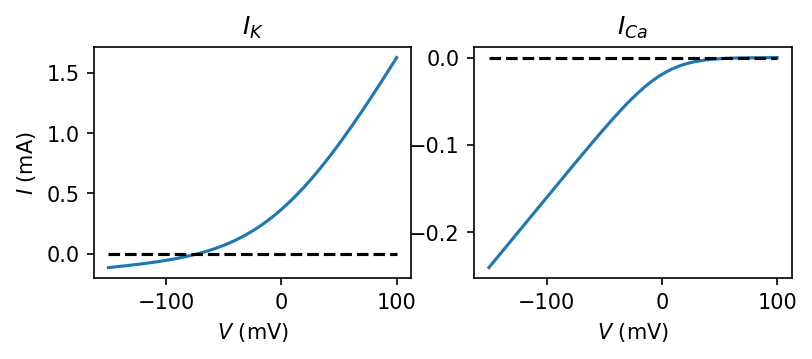

In [3]:
tempC = 6.3 # Temperature in celcius
V = np.linspace(-150, 100, 251)

# Permeability
P = 0.01*0.001

# Potassium concentrations in mM
Kin = 400.0
Kout = 20.0

# Calcium concentrations in mM
Cain= 1E-4
Caout = 10.0

IK = ghk(V, Kin, Kout, P=P, celsius=tempC)
ICa = ghk(V, Cain, Caout, P=P, z=2, celsius=tempC)

fig, ax = plt.subplots(1, 2, figsize=(6, 2))
ax[0].plot(V, IK,  label='$I_K$')
ax[0].plot([np.min(V), np.max(V)], [0, 0], 'k--')
ax[0].set_title('$I_K$')
ax[0].set_xlabel('$V$ (mV)')
ax[0].set_ylabel('$I$ (mA)')

ax[1].plot(V, ICa, label='$I_{Ca}$')
ax[1].plot([np.min(V), np.max(V)], [0, 0], 'k--')
ax[1].set_title('$I_{Ca}$')
ax[1].set_xlabel('$V$ (mV)')